### Testing websites themes in order to decide if there are differences in user traffic and customer behavious 
- A/B tests usually compare an option that we’re currently using to a new option that we suspect might be better
- in this case we want to see if different website platforms drives more book purchases (higher conversion rates) and better user engagement   
- data is taken from [here](https://statso.io/light-theme-and-dark-theme-case-study/), and example of solution is [here](https://thecleverprogrammer.com/2023/07/24/a-b-testing-of-themes-using-python/). Columns of dataset are following: 
    - Theme: dark or light
    - Click Through Rate: The proportion of the users who click on links or buttons on the website.
    - Conversion Rate: The percentage of users who signed up on the platform after visiting for the first time. (this is num_coverted_visitors/total_numof visitors *100)
    - Bounce Rate: The percentage of users who leave the website without further interaction after visiting a single page.
    - Scroll Depth: The depth to which users scroll through the website pages.
    - Age: The age of the user.
    - Location: The location of the user.
    - Session Duration: The duration of the user’s session on the website.
    - Purchases: Whether the user purchased the book (Yes/No).
    - Added_to_Cart: Whether the user added books to the cart (Yes/No).

To test if change in themes means higher number of purchase we can set hypothesis as follows :
- H0: Purchase cases are not significantly different between dark and light theme.
- H1: Purchase cases are evidently different between users of dark and of light theme.   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
df=pd.read_csv('website_ab_test.csv')
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [3]:
df.isna().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Click Through Rate,1000.0,0.256048,0.139265,0.010767,0.140794,0.253715,0.370674,0.499989
Conversion Rate,1000.0,0.253312,0.139092,0.010881,0.131564,0.252823,0.373040,0.498916
Bounce Rate,1000.0,0.505758,0.172195,0.200720,0.353609,0.514049,0.648557,0.799658
Scroll_Depth,1000.0,50.319494,16.895269,20.011738,35.655167,51.130712,64.666258,79.997108
Age,1000.0,41.528000,14.114334,18.000000,29.000000,42.000000,54.000000,65.000000
Session_Duration,1000.0,924.999000,508.231723,38.000000,466.500000,931.000000,1375.250000,1797.000000


In [5]:
df.Theme.value_counts(normalize=True) # there is approximately same number of samples in both groups 

Dark Theme     0.514
Light Theme    0.486
Name: Theme, dtype: float64

In [6]:
#change the column types from object to boolean 
df.replace({'Yes':True, 'No':False}, inplace=True)

In [9]:
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,False,True
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,False,True
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,True,True
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,True,False
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,False,False


We could check click through rates, conversion rates and bounce rate, we can check relationship between theme and weather purchase was made, weather is added to cart, which session was longer 
 

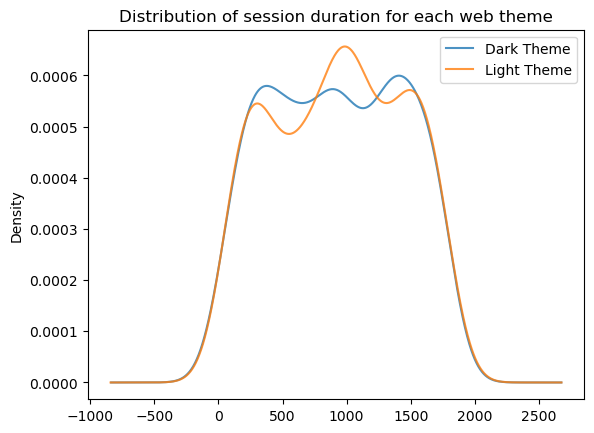

In [28]:
#distribution of session duration
df.groupby('Theme')['Session_Duration'].plot(kind='kde', alpha=0.8)
plt.legend()
plt.title('Distribution of session duration for each web theme')
plt.show()

 Average duration session is slightly higher for lighter theme. But overall,there is no significant differences in durations.  

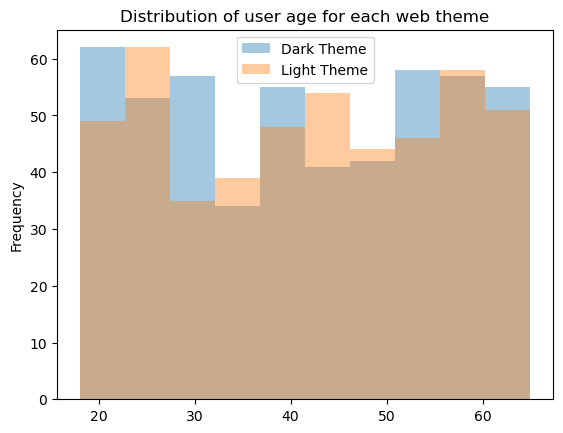

In [21]:
df.groupby('Theme')['Age'].plot(kind='hist', alpha=0.4)
plt.legend()
plt.title('Distribution of user age for each web theme')
plt.show()

Most users are in age between 20 and 30. There is no significant difference between theme preferences depending on age. 

In [29]:
df.groupby('Theme')['Purchases'].value_counts(normalize=True)


Theme        Purchases
Dark Theme   True         0.503891
             False        0.496109
Light Theme  True         0.530864
             False        0.469136
Name: Purchases, dtype: float64

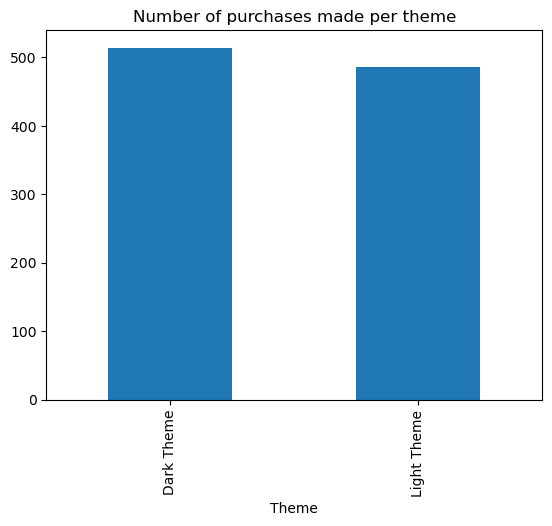

In [16]:
purchases = df.groupby('Theme')['Purchases'].count()
purchases.plot.bar()
plt.title('Number of purchases made per theme')
plt.show()

Number of purchases is slighlty higher with dark as with light theme, but we should not forget that sample of users who use dark theme is slighlty higher.
However when we see the percentage of users in each group who made purchase, we can see that with lighter theme 53% users made purchase comparing to 50% of darker theme users.


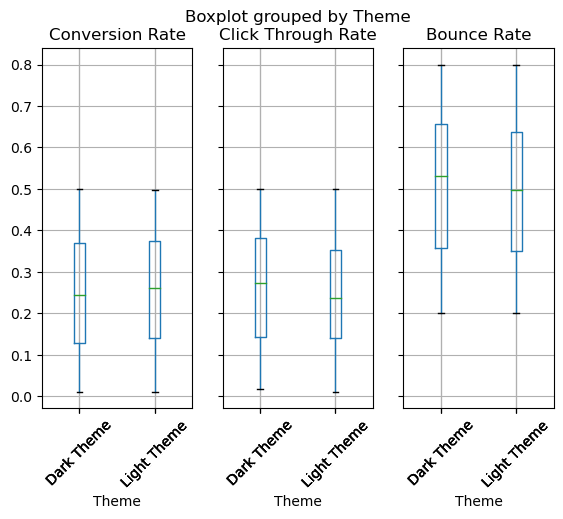

In [26]:
conv = df.groupby('Theme')[['Scroll_Depth', 'Conversion Rate']]

df.boxplot(column=['Conversion Rate', 'Click Through Rate', 'Bounce Rate'], by='Theme', layout=(1,3), rot=45)
plt.show()

Conversion rate distributions are approximately same, average is slighlty higher for lighter theme. Click through rate distribution slighly better for dark theme but as well as bounce rate. 

To see if difference in purchases between light and dark theme is significant we will use the purchase counts for both group and then, use z-score to evaluate differences in distributions of purchases measured in standard deviations and check if difference is significant. 

In [37]:
light_purchases = df[(df['Theme']=='Light Theme') & (df['Purchases']==True)].shape[0]
dark_purchases = df[(df['Theme']=='Dark Theme') & (df['Purchases']==True)].shape[0]
total_light = df[df['Theme']=='Light Theme'].shape[0]
total_dark = df[df['Theme']=='Dark Theme'].shape[0]
samples = [total_light, total_dark]
conversion_counts = [light_purchases, dark_purchases]

light_conversion = light_purchases/total_light
dark_conversion = dark_purchases/total_dark

print(light_conversion)
print(dark_conversion)

#print()
#conversion rate is nothing else but calculating portion of purchases made to overall sample size for particular theme
  

0.5308641975308642
0.5038910505836576


In [42]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

zstat, pvalue = proportions_ztest(conversion_counts, samples)

print('z-statistics:', zstat, 'p-value:', pvalue)


z-statistics: 0.8531246206222649 p-value: 0.39359019934127804


Z-statistic of app 0.85 shows positive value and means that conversion rate of light theme is slightly higher than dark one. If we look at the p-value, which is small or below level of significance of 0.05 in case if between group variation is large enough and there is no overlaps and in case if between-group variation is small, there are overlaps and in-group variation is large, this will raise the p-value. in this example P value of app. 0.394 is quite high, bigger than 0.05, therefore we cannot reject the H0, and we cannot claim that one theme drives more purchases as the other.

We could check the significance of click-trough rate differences for both groups. As we saw in boxplots above there are slightly differences, and dark theme seem to have higher mean.

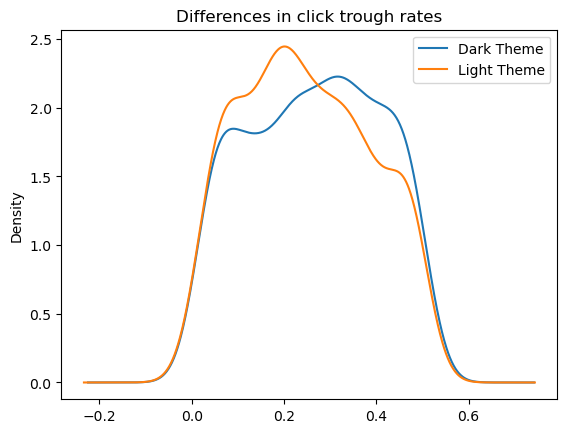

In [45]:
click = df.groupby('Theme')['Click Through Rate']
click.plot(kind='kde')
plt.legend()
plt.title('Differences in click trough rates')
plt.show()

we will do this by bootstraping - we will create pull 700 samples from dataset with replacement, calculate mean of click-through rate for each theme

In [46]:
df.groupby('Theme')['Click Through Rate'].mean()

Theme
Dark Theme     0.264501
Light Theme    0.247109
Name: Click Through Rate, dtype: float64

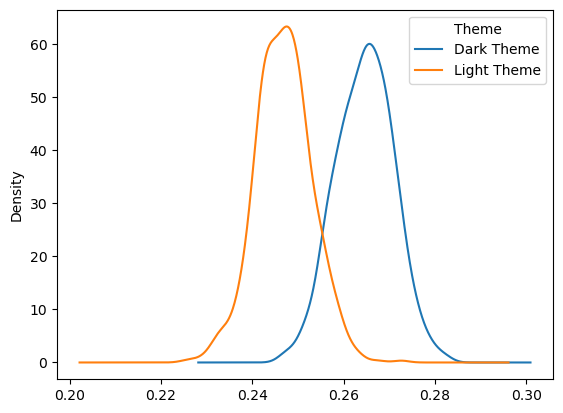

In [49]:
bootstraps = []
for i in range(700):
    boot_mean = df.sample(frac=1, replace=True).groupby('Theme')['Click Through Rate'].mean()
    bootstraps.append(boot_mean)

ctr_df = pd.DataFrame(bootstraps)

ctr_df.plot(kind='kde')
plt.show()

KDE histogram here are showing us the bootstraped uncertanity of what ctr for both themes could be . We see some difference ,and we can calculate % of change of ctr between both themes 

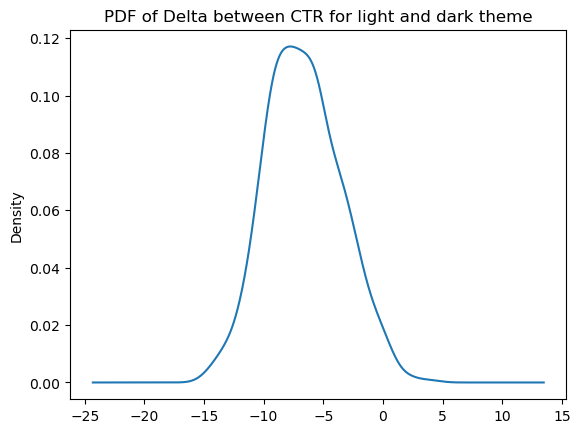

In [50]:
ctr_df['delta'] = (ctr_df['Light Theme'] - ctr_df['Dark Theme'])/ctr_df['Dark Theme'] *100

ctr_df['delta'].plot(kind='kde')
plt.title('PDF of Delta between CTR for light and dark theme')
plt.show()

In [51]:
prob = (ctr_df['delta']>0).mean()
prob

0.02